# Cubic equations of state

Understanding Cubic Equations of State (EOS) with a Focus on the Peng-Robinson Model

## Introduction
Cubic Equations of State (EOS) play a crucial role in modeling the thermodynamic behavior of fluids, particularly in the field of chemical engineering and process industries. Among the various cubic EOS models, the Peng-Robinson (PR) equation stands out as one of the most widely used and effective approaches for describing the behavior of real gases and liquids. In this summary, we will explore the fundamentals of cubic EOS, with a specific focus on the Peng-Robinson model.

## Fundamentals of Cubic Equations of State
Cubic Equations of State are mathematical models that approximate the thermodynamic properties of fluids, providing a link between pressure, volume, and temperature. These equations are cubic in volume and involve empirical parameters to account for the molecular interactions within the substance. The three most common cubic EOS are the Van der Waals equation, Redlich-Kwong equation, and the Peng-Robinson equation.

## Van der Waals Equation
The Van der Waals equation is one of the earliest cubic EOS and incorporates correction terms to account for the finite size of gas molecules and the attractive forces between them. While a significant improvement over the ideal gas law, the Van der Waals equation has limitations, especially in accurately predicting the behavior of real gases under various conditions.

## Redlich-Kwong Equation
The Redlich-Kwong equation builds upon the Van der Waals model by introducing temperature-dependent parameters to better capture the non-ideal behavior of gases. Although an improvement, it still has limitations in accurately representing the behavior of fluids, particularly at high pressures.

## Peng-Robinson Equation
The Peng-Robinson equation, proposed by Dukler, Peng, and Robinson in 1976, is a significant advancement in cubic EOS. It addresses the shortcomings of earlier models by incorporating a correction factor alpha (α) and an adjustable parameter 'b' to improve the representation of real gas behavior. The Peng-Robinson equation is particularly effective in describing the phase behavior of hydrocarbons and other complex fluids.

### Peng-Robinson Equation Parameters
The PR equation is defined as follows:

$ P = \frac{RT}{V - b} - \frac{a\alpha}{(V + \epsilon b)(V - b)} $


Where:
- $ P $ is the pressure,
- $ R $ is the gas constant,
- $ T $ is the temperature,
- $ V $ is the molar volume,
- $ a $ and $ b $ are substance-specific parameters,
- $ \alpha $ is the temperature-dependent parameter,
- $ \epsilon $ is a dimensionless constant.

The attractive part of the equation is represented by the first term, while the repulsive part is represented by the second term. The adjustable parameters $ a $, $ b $, and $ \alpha $ are determined through fitting experimental data or derived from molecular characteristics.

### Advantages of the Peng-Robinson Equation
1. **Accuracy in Describing Phase Behavior:** The Peng-Robinson equation performs well in predicting phase equilibria, especially for systems involving hydrocarbons and other complex substances.

2. **Versatility:** The PR equation is applicable over a wide range of temperatures and pressures, making it suitable for various industrial applications.

3. **Inclusion of Temperature Dependency:** The introduction of the temperature-dependent parameter \( \alpha \) enhances the accuracy of the model across different thermodynamic conditions.

4. **Computational Efficiency:** The Peng-Robinson equation strikes a good balance between accuracy and computational efficiency, making it a popular choice in process simulation and optimization.

### Applications of Cubic Equations of State
Cubic EOS models, including the Peng-Robinson equation, find extensive applications in various industries, such as oil and gas, petrochemicals, and chemical engineering. They are employed in process simulation, equipment design, and optimization of separation processes. Additionally, these models are valuable in predicting phase equilibria for the development of phase diagrams, critical points, and understanding the behavior of fluids under different conditions.

## Conclusion
Cubic Equations of State, with the Peng-Robinson model as a prime example, have revolutionized the field of thermodynamics and fluid behavior modeling. The accuracy and versatility of the PR equation make it a preferred choice for engineers and scientists working in diverse industries. As technology advances, researchers continue to refine and develop new equations of state to further improve the representation of real gas and liquid behavior, contributing to the efficiency and reliability of industrial processes.

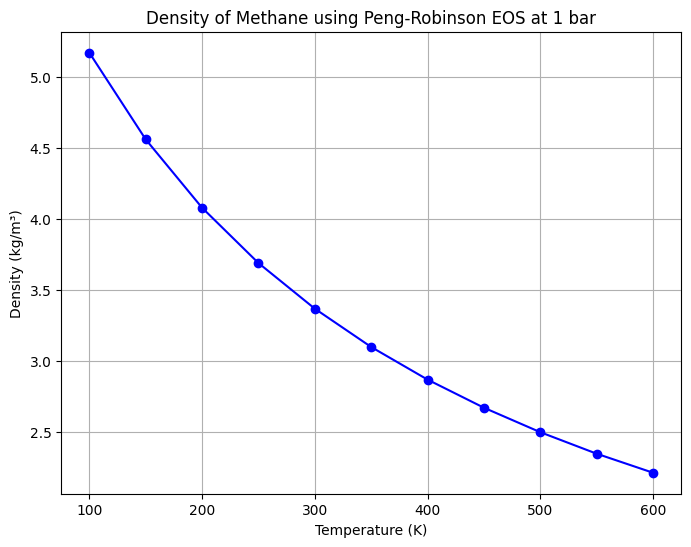

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
R = 8.314  # Gas constant in J/(mol*K)
P = 1.0  # Pressure in bar

# Substance-specific parameters for methane
a = 3.913  # in (L^2 bar) / (mol^2)
b = 0.043  # in L/mol
alpha = 0.13
epsilon = 1.0

# Molar mass of methane in g/mol
molar_mass_CH4 = 16.04  # g/mol

# Function to calculate molar volume using Peng-Robinson EOS
def calculate_molar_volume(T):
    # Convert temperature to Kelvin
    T_Kelvin = T + 273.15

    # Peng-Robinson EOS
    def PR_EOS(V):
        return R * T_Kelvin / (V - b) - (a * alpha) / ((V + epsilon * b) * (V - b)) - P

    # Initial guess for molar volume
    V_initial_guess = 10.0

    # Solve the equation to find molar volume using scipy's fsolve
    result = fsolve(PR_EOS, V_initial_guess)
    
    return result[0]

# Temperature range
temperature_range = np.arange(100, 601, 50)

# Calculate molar volumes for each temperature
molar_volumes = [calculate_molar_volume(T) for T in temperature_range]

# Calculate densities from molar volumes using molar mass
densities = (1.0 / np.array(molar_volumes)) * molar_mass_CH4 * 1e3  # Convert from g/L to kg/m^3

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(temperature_range, densities, marker='o', linestyle='-', color='b')
plt.title('Density of Methane using Peng-Robinson EOS at 1 bar')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (kg/m³)')
plt.grid(True)
plt.show()